# Exercise 00 - Hypothesis Concept in Machine Learning

In [118]:
import numpy as np
import math

In [2]:
def dot(x, y):
    dot = 0.0
#     print(x.ndim)
#     print(y.ndim)
#     if not isinstance(x, np.ndarray) or x.size == 0 or x.ndim != 1:
#         return None
#     if not isinstance(y, np.ndarray) or y.size == 0 or y.ndim != 1:
#         return None
#     if x.ndim != y.ndim:
#         return None
    
    for elem in range(x.size):
        dot += x[elem] * y[elem]
    return dot

In [3]:
def predict_(theta, X):
    if not isinstance(X, np.ndarray) or X.size == 0 or X.ndim != 2:
        return None
    if not isinstance(theta, np.ndarray) or theta.size == 0 or theta.ndim > 2:
        return None
    if X.shape[1] + 1 != theta.size:
        print("Incompatible dimension match between X and theta")
        return None
    pred = np.empty(0)
    X_conc = np.concatenate((np.ones((X.shape[0],1)), X), axis=1)
    for j in range(X.shape[0]):
        pred = np.append(pred, dot(theta[:,0], X_conc[j]))
    return (pred.reshape(-1, 1))

In [4]:
import numpy as np
X1 = np.array([[0.], [1.], [2.], [3.], [4.]])
theta1 = np.array([[2.], [4.]])
print(predict_(theta1, X1))
# array([[2], [6], [10], [14.], [18.]])

X2 = np.array([[1], [2], [3], [5], [8]])
theta2 = np.array([[2.]])
print(predict_(theta2, X2))

X3 = np.array([[0.2, 2., 20.], [0.4, 4., 40.], [0.6, 6., 60.], [0.8, 8.,
80.]])
theta3 = np.array([[0.05], [1.], [1.], [1.]])
print(predict_(theta3, X3))
# array([[22.25], [44.45], [66.65], [88.85]])

[[ 2.]
 [ 6.]
 [10.]
 [14.]
 [18.]]
Incompatible dimension match between X and theta
None
[[22.25]
 [44.45]
 [66.65]
 [88.85]]


# Exercise 01 - Cost function Concept

In [5]:
def cost_elem_(theta, X, Y):
    J_elem = (1 / (2 * X.shape[0])) * (predict_(theta, X) - Y)**2
    return J_elem.reshape(-1, 1)

def cost_(theta, X, Y):
    J_value = 0.0
    J_elem = cost_elem_(theta, X, Y)
    for i in range(X.shape[0]):
        J_value += float(J_elem[i])
    return J_value

In [6]:
import numpy as np
X1 = np.array([[0.], [1.], [2.], [3.], [4.]])
theta1 = np.array([[2.], [4.]])
Y1 = np.array([[2.], [7.], [12.], [17.], [22.]])

print(cost_elem_(theta1, X1, Y1))
print()
print(cost_(theta1, X1, Y1))

X2 = np.array([[0.2, 2., 20.], [0.4, 4., 40.], [0.6, 6., 60.], [0.8, 8.,
80.]])
theta2 = np.array([[0.05], [1.], [1.], [1.]])
Y2 = np.array([[19.], [42.], [67.], [93.]])

print(cost_elem_(theta2, X2, Y2))
print()
print(cost_(theta2, X2, Y2))

[[0. ]
 [0.1]
 [0.4]
 [0.9]
 [1.6]]

3.0
[[1.3203125]
 [0.7503125]
 [0.0153125]
 [2.1528125]]

4.238750000000007


# Exercise 02 - Descent Gradient

In [7]:
def mat_mat_prod(x, y):
#     if not isinstance(x, np.ndarray) or x.size == 0 or x.ndim != 2:
#         return None
#     if not isinstance(y, np.ndarray) or y.size == 0 or x.ndim != 2:
#         return None
#     if x.shape[1] != y.shape[0]:
#         return None
    for j in range(y.shape[1]):
        if j == 0:
            prod = mat_vec_prod(x, y[:,j])
        else:
            prod = np.append(prod, mat_vec_prod(x, y[:,j]), axis=1)
    return prod

def mat_vec_prod(x, y):
    prod = np.empty(0)
#     if not isinstance(x, np.ndarray) or x.size == 0 or x.ndim != 2:
#         return None
#     if not isinstance(y, np.ndarray) or y.size == 0:
#         return None
#     if x.shape[1] != y.shape[0]:
#         return None
    for elem in x:
        prod = np.append(prod, dot(elem, y.ravel()))
    return prod.reshape(-1, 1)

In [8]:
def gradient(x, y, theta):
    """Computes a gradient vector from three non-empty numpy.ndarray, using
    a for-loop. The two arrays must have the compatible dimensions.
    Args:
     x: has to be an numpy.ndarray, a matrice of dimension m * n.
     y: has to be an numpy.ndarray, a vector of dimension m * 1.
     theta: has to be an numpy.ndarray, a vector n * 1.
    Returns:
     The gradient as a numpy.ndarray, a vector of dimensions n * 1.
     None if x, y, or theta are empty numpy.ndarray.
     None if x, y and theta do not have compatible dimensions.
    Raises:
     This function should not raise any Exception.
    """
    x = np.concatenate((np.ones((x.shape[0],1)), x), axis=1)
    nabla = np.empty(0)
    if not isinstance(x, np.ndarray) or x.size == 0 or x.ndim != 2:
        print('Error Gradient : x dim')
        return None
    if not isinstance(y, np.ndarray) or y.size == 0 or y.ndim > 2:
        print('Error Gradient : y dim')
        return None
    if not isinstance(theta, np.ndarray) or theta.size == 0 or theta.ndim > 2:
        print('Error Gradient : theta dim')
        return None
    if x.shape[0] != y.size:
        print('Error Gradient : x.shape[0] != y.size')
        return None
    if x.shape[1] != theta.size:
        print('Error Gradient : x.shape[1] != theta.size')
        return None
    for j in range(theta.size):
        my_sum = 0.0
        for elem in range(y.size):
            my_sum += (dot(theta, x[elem,:].reshape(-1 ,1)) - y[elem]) * x[elem,j]
        nabla = np.append(nabla, my_sum / y.size)
    return nabla.reshape(-1, 1)

In [9]:
def fit_(theta, X, Y, alpha=0.01, n_cycle=2000):
    for i in range(n_cycle):
        theta = theta - (alpha * gradient(X, Y, theta))
    return theta

In [10]:
X1 = np.array([[0.], [1.], [2.], [3.], [4.]])
Y1 = np.array([[2.], [6.], [10.], [14.], [18.]])
theta1 = np.array([[1.], [1.]])
theta1 = fit_(theta1, X1, Y1, alpha = 0.01, n_cycle=2000)
print(theta1)


[[2.00011814]
 [3.99995856]]


# Exercise 03 - The Linear Regression with Class

In [224]:
class MyLinearRegression():
    def __init__(self, theta):
        if (not isinstance(theta, np.ndarray) and not isinstance(theta, list))\
            or (isinstance(theta, np.ndarray) and (theta.size == 0 or theta.ndim > 2))\
            or (isinstance(theta, list) and len(theta) == 0):
                print('Error init : theta dim')
                return None
        self.theta = np.array(theta).reshape(-1, 1)
    def predict_(self, X):
        if not isinstance(X, np.ndarray) or X.size == 0 or X.ndim != 2:
            return None
        if not isinstance(self.theta, np.ndarray) or self.theta.size == 0 or self.theta.ndim > 2:
            return None
        if X.shape[1] + 1 != self.theta.size:
            print("Incompatible dimension match between X and theta")
            return None
        pred = np.empty(0)
        X_conc = np.concatenate((np.ones((X.shape[0],1)), X), axis=1)
        for j in range(X.shape[0]):
            pred = np.append(pred, dot(self.theta[:,0], X_conc[j]))
        return (pred.reshape(-1, 1))

    def cost_elem_(self, X, Y):
        J_elem = (1 / (2 * X.shape[0])) * (predict_(self.theta, X) - Y)**2
        return J_elem.reshape(-1, 1)

    def cost_(self, X, Y):
        J_value = 0.0
        J_elem = cost_elem_(self.theta, X, Y)
        for i in range(X.shape[0]):
            J_value += float(J_elem[i])
        return J_value
    def fit_(self, X, Y, alpha=0.01, n_cycle=2000):
        for i in range(n_cycle):
            self.theta = self.theta - (alpha * gradient(X, Y, self.theta))
        return self.theta
    def mse_(self, x, y):
        mse_ = 0.0
        y_hat = self.predict_(X)
        for i in range(y.size):
            mse_ += (y[i] - y_hat[i])**2
        return mse_ / y.size
    def normalequation_(self, X, Y):
        X = np.concatenate((np.ones((X.shape[0],1)), X), axis=1)
        theta = mat_mat_prod(np.linalg.inv(mat_mat_prod(X.T, X)), mat_mat_prod(X.T, Y))
        self.theta = theta
    def rmse_(self, X, Y):
        rmse = 0.0
        y_hat = self.predict_(X)
        rmse = (math.sqrt((y_hat - Y)**2) / N)
    def r2score_(self, X, Y):
        r2 = 0.0
        y_hat = y_hat = self.predict_(X)
        variance_fit = abs(Y - y_hat).sum()
        variance_mean = abs(Y - np.full(Y.shape, Y.mean())).sum()
        print(variance_fit.sum())
        print(variance_mean.sum())
        r2 = 1 - (variance_fit / variance_mean)
        return(r2)
        
        

In [12]:
# X = np.array([[1., 1., 2., 3.], [5., 8., 13., 21.], [34., 55., 89., 144.]])
# Y = np.array([[23.], [48.], [218.]])
# mylr = MyLinearRegression([[1.], [1.], [1.], [1.], [1]])
# print(mylr.predict_(X))

# print(mylr.cost_elem_(X,Y))

# print(mylr.cost_(X,Y))

# mylr.fit_(X, Y, alpha = 1.6e-4, n_cycle=200000)
# print(mylr.theta)

# print(mylr.predict_(X))

# print(mylr.cost_elem_(X,Y))

# print(mylr.cost_(X,Y))

# Exercise 04 - Linear Regression

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [14]:
data = pd.read_csv("../subjects/day01/resources/are_blue_pills_magics.csv")
Xpill = np.array(data['Micrograms']).reshape(-1,1)
Yscore = np.array(data['Score']).reshape(-1,1)

In [15]:
linear_model1 = MyLinearRegression(np.array([[89.0], [-8]]))
linear_model2 = MyLinearRegression(np.array([[89.0], [-6]]))
linear_model3 = MyLinearRegression(np.array([[80.],[-1.]]))

In [16]:
linear_model3.fit_(Xpill, Yscore)
Y_model1 = linear_model1.predict_(Xpill)
Y_model2 = linear_model2.predict_(Xpill)
Y_model3 = linear_model3.predict_(Xpill)

In [17]:
print(linear_model1.mse_(Xpill, Yscore))
# 57.60304285714282
print(mean_squared_error(Yscore, Y_model1))
# 57.603042857142825
print(linear_model2.mse_(Xpill, Yscore))
# 232.16344285714285
print(mean_squared_error(Yscore, Y_model2))
# 232.16344285714285

[57.60304286]
57.603042857142825
[232.16344286]
232.16344285714285


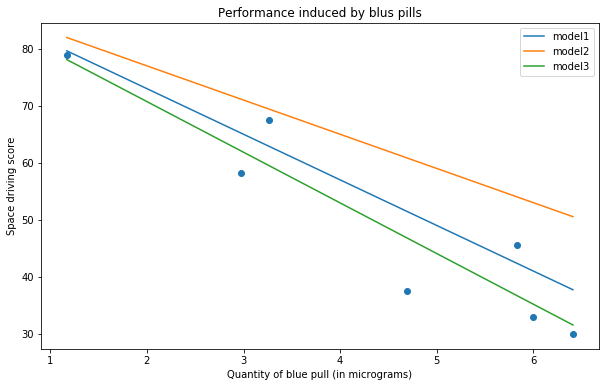

In [18]:
plt.figure(figsize = (10,6))
plt.scatter(data.Micrograms, data.Score)
plt.title("Performance induced by blus pills")
plt.ylabel("Space driving score")
plt.xlabel("Quantity of blue pull (in micrograms)")
plt.plot(Xpill, Y_model1, label='model1')
plt.plot(Xpill, Y_model2, label='model2')
plt.plot(Xpill, Y_model3, label='model3')
plt.legend()
plt.show()

28.801521428571412


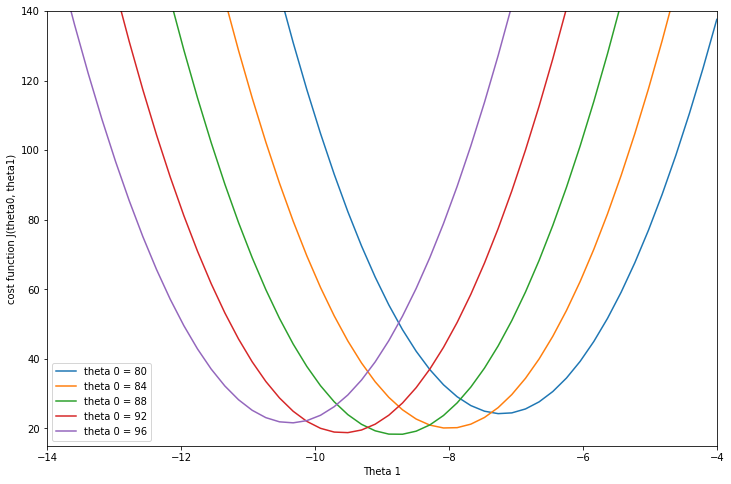

In [19]:
print(linear_model1.cost_(Xpill,Yscore))
plt.figure(figsize=(12,8))
plt.xlim(-14, -4)
plt.ylim(15, 140)
for j in range(80, 100, 4):
    cost = list()
    for i in np.linspace(-14, -4, num=50):
        tmp = cost_(np.array([[j], [i]]), Xpill, Yscore)
        cost.append(tmp)
    plt.plot(np.linspace(-14, -4, num=50), cost, label='theta 0 = {}'.format(j))
plt.ylabel('cost function J(theta0, theta1)')
plt.xlabel('Theta 1')
plt.legend()
plt.show()

# Exercise 05 - Mutiples features and Linear Gradient Descent

# Part One: single linear regression

In [20]:
space_df = pd.read_csv("../subjects/day01/resources/spacecraft_data.csv")

In [21]:
space_df

,Age,Thrust_power,Terameters,Sell_price
0,0.000000,102.884445,30.117605,768.658817
1,1.144554,9.000000,96.110216,62.450103
2,3.420318,21.804128,11.971169,346.689592
3,3.604186,30.035427,63.635897,255.096497
4,2.660055,129.444990,27.010236,921.303347
...,...,...,...,...
195,19.367781,95.957785,139.184178,20.000000
196,17.292362,131.718738,102.329786,402.359178
197,17.769504,110.547066,104.018450,260.168988
198,20.000000,178.680560,80.353100,611.782396


In [22]:
model_age = MyLinearRegression([[1000.0], [-1.0]])
model_thrust = MyLinearRegression([[0.0], [4.0]])
model_tmeters = MyLinearRegression([[700.0], [-3.0]])

In [29]:
Y = np.array(space_df[['Sell_price']])
Age = np.array(space_df[['Age']])
Thrust = np.array(space_df[['Thrust_power']])
Tmeters = np.array(space_df[['Terameters']])

# Thrust
# Age
# Tmeters

In [30]:
model_age.fit_(Age[:,0].reshape(-1,1), Y, alpha = 0.01, n_cycle = 1000)
model_thrust.fit_(Thrust[:,0].reshape(-1,1), Y, alpha = 0.0001, n_cycle = 1000)
model_tmeters.fit_(Tmeters[:,0].reshape(-1,1), Y, alpha = 0.0001, n_cycle = 1000)

array([[700.88312816],
       [ -2.44339338]])

In [31]:
y_pred_age = model_age.predict_(Age)
y_pred_thrust = model_thrust.predict_(Thrust)
y_pred_tmeters = model_tmeters.predict_(Tmeters)

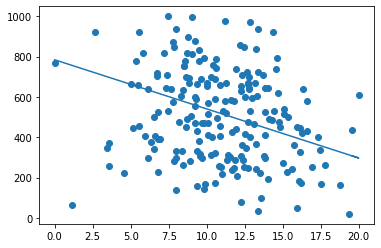

In [32]:
plt.scatter(space_df['Age'], space_df['Sell_price'])
plt.plot(Age, y_pred_age)

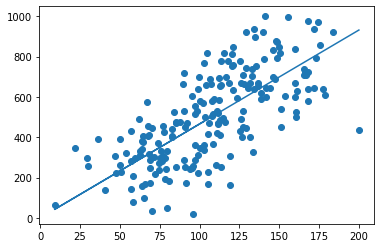

In [33]:
plt.scatter(space_df['Thrust_power'], space_df['Sell_price'])
plt.plot(Thrust, y_pred_thrust)

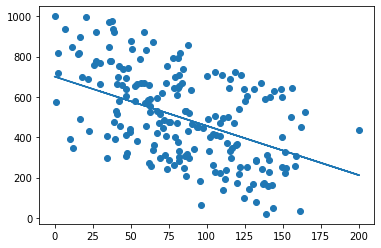

In [34]:
plt.scatter(space_df['Terameters'], space_df['Sell_price'])
plt.plot(Tmeters, y_pred_tmeters)

### Part Two: Multilinear Regression (A New Hope)

In [74]:
model_m = MyLinearRegression([400.0, -11.0, 4.5, -2.5])

In [75]:
X = np.array(space_df[['Age','Thrust_power','Terameters']])
Y = np.array(space_df[['Sell_price']])

In [76]:
model_m.fit_(X, Y, alpha = 0.00005, n_cycle = 6000)
model_m.mse_(X, Y)

array([429.12442231])

In [77]:
y_hat = model_m.predict_(X)

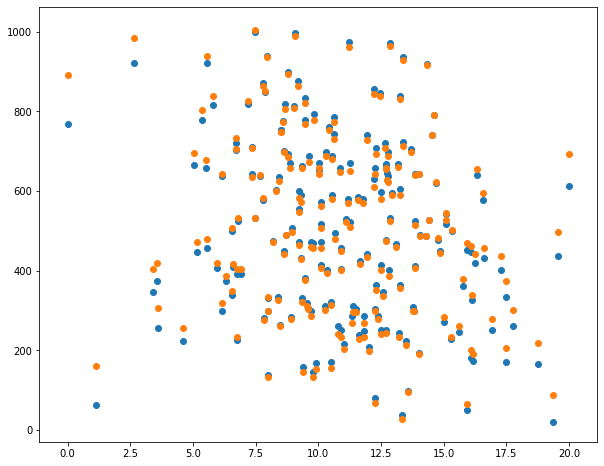

In [80]:
plt.figure(figsize=(10,8))
plt.scatter(Age, Y)
plt.scatter(Age, y_hat)

plt.show()

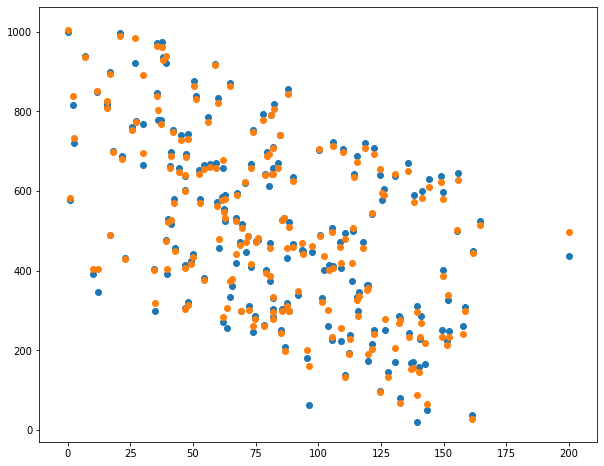

In [81]:
plt.figure(figsize=(10,8))
plt.scatter(Tmeters, Y)
plt.scatter(Tmeters, y_hat)

plt.show()

# Exercise 06 - Mutiples features and Normal Equation 

In [102]:
model_normal = MyLinearRegression([400.0, -11.0, 4.5, -2.5])
model_LR = MyLinearRegression([400.0, -11.0, 4.5, -2.5])

In [107]:
model_normal.normalequation_(X, Y)
model_LR.fit_(X, Y, alpha=0.00005, n_cycle = 10000)

[[385.67399685]
 [-24.36213105]
 [  5.66726993]
 [ -2.66821456]]


In [105]:
print(model_normal.mse_(X, Y))
print(model_LR.mse_(X, Y))
y_pred_norm = model_normal.predict_(X)
y_pred_lr = model_LR.predict_(X)

[413.05299143]
[425.20704119]


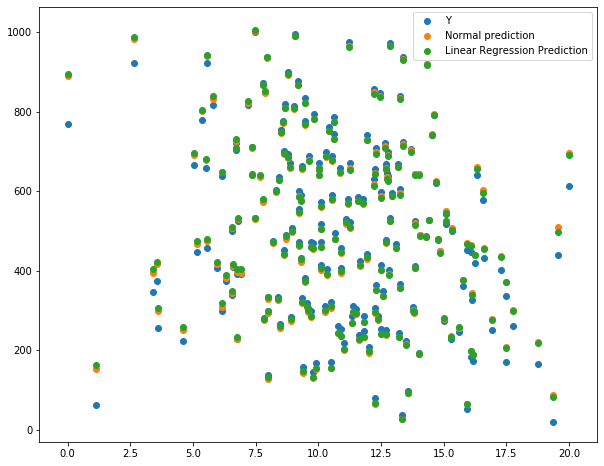

In [116]:
plt.figure(figsize=(10, 8))
plt.scatter(Age, Y, label='Y')
plt.scatter(Age, y_pred_norm, label='Normal prediction')
plt.scatter(Age, y_pred_lr, label='Linear Regression Prediction')
plt.legend()
plt.show()

# Bonus Exercise - Learning Rate and Quadratic Hypothesis

### Part Zero - Nothing Else (but) Metrics

In [120]:
saturn_df = pd.read_csv("../subjects/day01/resources/saturn_asteroids.csv")

In [121]:
saturn_df

,# x1,x1**2,x2,x2**2,y
0,14.263345,203.443018,9.664967,93.411579,55.100248
1,1.064010,1.132117,2.533052,6.416354,5.808565
2,17.642486,311.257326,8.459919,71.570222,60.844557
3,5.756596,33.138401,5.078344,25.789577,20.488656
4,12.090395,146.177647,2.070983,4.288970,30.886121
...,...,...,...,...,...
1995,9.812014,96.275623,6.050539,36.609025,32.400486
1996,6.304753,39.749910,5.889572,34.687058,23.484234
1997,6.300211,39.692665,9.723203,94.540677,34.843362
1998,7.653938,58.582774,9.165493,84.006269,36.228435


In [225]:
X = np.array(saturn_df['x2']).reshape(-1, 1)
Y = np.array(saturn_df['y']).reshape(-1, 1)

In [226]:
model_test =  MyLinearRegression([24.35307598, 1.78405685])

In [227]:
# model_test.fit_(X, Y, n_cycle=100)

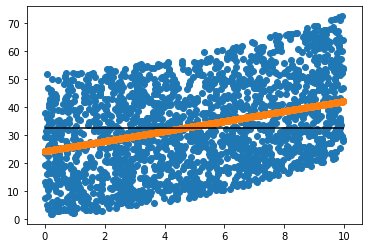

In [228]:
y_hat = model_test.predict_(X)
plt.scatter(X, Y)
plt.scatter(X, y_hat)
plt.hlines(Y.mean(), 0, 10)

In [229]:
model_test.r2score_(X, Y)

25283.679233109782
26548.825374327953


0.04765356370310592

### Part One - Find the best hypothesis

In [ ]:
model_saturn = MyLinearRegression()